In [448]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import csv
import numpy as np
import urllib.request
import requests
import json

This imports the police stops data sheet and shows traffic stops. It also displays the headers as well as the total number of rows in the data sheet. 

In [449]:
df = pd.read_csv (r'stops.csv')

filename = 'stops.csv'
with open('stops.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))

['\ufeffTYPE_OF_STOP', 'CITATION_CONTROL_NUMBER', 'ACTIVITY_RESULTS', 'OFFICER_GENDER', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'DRIVER_GENDER', 'DRIVER_RACE', 'DRIVER_AGE_RANGE', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId']
This is the total number of rows in the file: 
 23543


This section then changes the headers to simpler unique names that will differ the officer sheet. It also simplifies and removes columns that I didn't need for comparison. 

In [450]:
df.drop(columns=['CITATION_CONTROL_NUMBER', 'ACTIVITY_DATE', 'ACTIVITY_TIME', 'ACTIVITY_LOCATION', 'ACTIVITY_DIVISION', 'ACTIVITY_BEAT', 'NUMBER_OF_PASSENGERS', 'WAS_VEHCILE_SEARCHED', 'REASON_FOR_SEARCH', 'ObjectId'], inplace=True)
df.rename(columns={'TYPE_OF_STOP':'stop', 'ACTIVITY_RESULTS':'action', 'OFFICER_GENDER':'o_gender', 'OFFICER_RACE':"o_race", 'OFFICER_AGE_RANGE':"o_age", 'DRIVER_GENDER':'d_gender', 'DRIVER_RACE':"d_race", 'DRIVER_AGE_RANGE':"d_age"}, inplace=True)
df.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25


This identifies the races of the officers. 

In [451]:
df.o_race.unique()

array(['WHITE', 'BLACK', 'HISPANIC', 'ASIAN', 'UNKNOWN'], dtype=object)

This imports the LMPD employee data. I printed the header and the total numbers of rows. 

In [452]:
df3 = pd.read_csv (r'employee.csv')

filename = 'employee.csv'
with open('employee.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))
df3.head()

['\ufeffAOC_CODE', 'RANK_TITLE', 'OFFICER_SEX', 'OFFICER_RACE', 'OFFICER_AGE_RANGE', 'OFFICER_AGE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId']
This is the total number of rows in the file: 
 23543


,AOC_CODE,RANK_TITLE,OFFICER_SEX,OFFICER_RACE,OFFICER_AGE_RANGE,OFFICER_AGE,OFFICER_DIVISION,OFFICER_ASSIGNMENT,OFFICER_YEARS_SWORN,ObjectId
0,2151,POLICE OFFICER,F,W,40 - 49,47,6TH DIVISION ...,RESOURCE OFFICERS ...,23,1
1,2440,POLICE OFFICER,M,W,40 - 49,48,1ST DIVISION ...,DETECTIVES ...,19,2
2,2016,POLICE SERGEANT,M,A,40 - 49,49,TECHNICAL SERVICES ...,TECHNICAL SERVICES ...,23,3
3,2092,POLICE OFFICER,M,W,50 - 59,51,TRAINING ...,SPECIAL PROJECTS UNIT ...,23,4
4,2208,POLICE OFFICER,M,W,OVER 60,60,FORMER EMPLOYEE ...,NaN,34,5


This replaces the vales with simple unique values. Then drops columns that we dont need. 

In [453]:
df3.drop(columns=['AOC_CODE', 'RANK_TITLE', 'OFFICER_DIVISION', 'OFFICER_ASSIGNMENT', 'OFFICER_YEARS_SWORN', 'ObjectId'], inplace=True)
df3.rename(columns={'OFFICER_SEX':'oh_sex', 'OFFICER_RACE':'oh_race', 'OFFICER_AGE_RANGE':'oh_age_range', 'OFFICER_AGE':"oh_age"}, inplace=True)
df3.head()


,oh_sex,oh_race,oh_age_range,oh_age
0,F,W,40 - 49,47
1,M,W,40 - 49,48
2,M,A,40 - 49,49
3,M,W,50 - 59,51
4,M,W,OVER 60,60


In [472]:
df3.dropna(
      axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)
df3.sort_values(by=['oh_age'], inplace=True)
df3.head(15)

,oh_sex,oh_race,oh_age_range,oh_age
2463,M,W,21 - 29,21
2462,M,W,21 - 29,21
2418,M,W,21 - 29,22
2469,M,B,21 - 29,22
2459,F,W,21 - 29,22
2444,M,H,21 - 29,22
2435,M,B,21 - 29,22
2409,M,W,21 - 29,22
2433,M,H,21 - 29,22
2470,M,W,21 - 29,22


This identifies the unique race values of the LMPD staff. 

In [473]:
df3.oh_race.unique()

array(['W ', 'B ', 'H ', 'A ', 'U '], dtype=object)

This identifies the average officer age and ther max and min age. 

In [474]:
print("The mean officer age is:", df3['oh_age'].mean())
print("The max officer age is:", df3['oh_age'].max())
print("The min officer age is:", df3['oh_age'].min())


The mean officer age is: 45.23330832708177
The max officer age is: 81
The min officer age is: 21


This sections joins the 2 data sets into a single data frame. 

In [475]:
df4 =  pd.concat([df, df3], axis = 1, join="inner")
df4.head()
# print(header_row)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19,F,W,40 - 49,47
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19,M,W,40 - 49,48
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40,M,A,40 - 49,49
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,50 - 59,51
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,OVER 60,60


In [476]:
df4['o_gender'] = df4['o_gender'].fillna('unknown')
df4.head()

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
0,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,16 - 19,F,W,40 - 49,47
1,TRAFFIC VIOLATION,CITATION ISSUED,F,WHITE,21 - 30,M,WHITE,16 - 19,M,W,40 - 49,48
2,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,31 - 40,M,A,40 - 49,49
3,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,50 - 59,51
4,COMPLAINT/CRIMINAL VIOLATION,CITATION ISSUED,M,WHITE,31 - 40,M,HISPANIC,20 - 25,M,W,OVER 60,60


This section identifies unique genders in the data frame to identify any out odd data variables. 

In [477]:
df4.o_gender.unique()

array(['M', 'F'], dtype=object)

This block is to remove the blank values. 

In [478]:
df4['oh_sex'] = df4['oh_sex'].fillna(' ')
df4.oh_sex.unique()

array(['F', 'M'], dtype=object)

In [498]:
# df4.groupby(by='oh_age')
# df4.sort_values('oh_age')
# df4.sort_values(by=['oh_age'], ascending=True)
# sorted_df = df4.sort_values(by=['oh_age'], ascending=True)
df4.sort_values(by=['oh_age'], inplace=True)
# df4.replace(np. nan,0)
# df4.replace(0, np.nan), inplace=True
# df4.fillna(value=0, np.na, inplace=True)
df4.oh_age.replace(to_replace = 0, value = "NaN ", inplace=True)
# df4.oh_sex.replace(to_replace = '' , value = "U", inplace=True)
df4.head(15)

,stop,action,o_gender,o_race,o_age,d_gender,d_race,d_age,oh_sex,oh_race,oh_age_range,oh_age
2463,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,F,BLACK,OVER 60,M,W,21 - 29,21
2462,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,21
2433,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,26 - 30,M,H,21 - 29,22
2409,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,21 - 30,M,BLACK,41 - 50,M,W,21 - 29,22
2469,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,20 - 25,M,B,21 - 29,22
2444,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,WHITE,51 - 60,M,H,21 - 29,22
2545,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,BLACK,31 - 40,M,H,21 - 29,22
2435,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,F,BLACK,20 - 25,M,B,21 - 29,22
2418,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,51 - 60,M,WHITE,26 - 30,M,W,21 - 29,22
2459,TRAFFIC VIOLATION,CITATION ISSUED,M,WHITE,41 - 50,M,WHITE,51 - 60,F,W,21 - 29,22


In [480]:
print("The mean officer age is:", df4['oh_age'].mean())
print("The max officer age is:", df4['oh_age'].max())
print("The min officer age is:", df4['oh_age'].min())

The mean officer age is: 45.23330832708177
The max officer age is: 81
The min officer age is: 21


In [481]:
sum(df4.oh_sex == 'M')

2282

In [482]:
sum(df4.oh_sex == 'F')

384

In [483]:
sum(df4.d_gender == 'M')

1751

In [484]:
sum(df4.d_gender == 'F')

915

In [485]:
d_gender = dict({
    'Driver Female' : sum(df4.d_gender == 'F'),
    'Driver Male' : sum(df4.d_gender == 'M')
})

print(d_gender)


{'Driver Female': 915, 'Driver Male': 1751}


In [486]:
oh_sex = dict( {
    'Male Officer' : sum(df4.oh_sex == 'M'),
    'Female Offier' : sum(df4.oh_sex == 'F')
})

print(oh_sex)

{'Male Officer': 2282, 'Female Offier': 384}


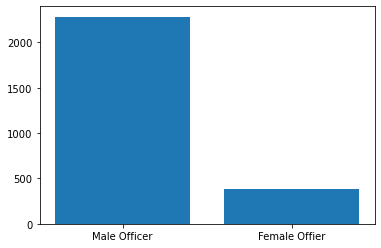

In [ ]:

data = oh_sex
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

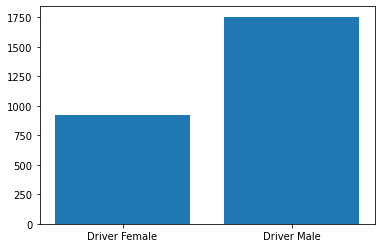

In [ ]:
data = d_gender
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

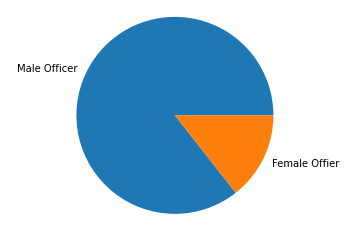

In [487]:
# Data to plot
labels = []
sizes = []

for x, y in oh_sex.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

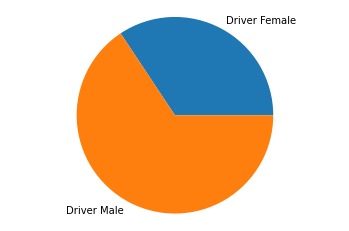

In [488]:
# Data to plot
labels = []
sizes = []

for x, y in d_gender.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

In [489]:
oraces =  df4.groupby('o_race')['o_race'].count()
draces =  df4.groupby('d_race')['d_race'].count()
print(oraces)
print(draces)

o_race
ASIAN         13
BLACK        523
HISPANIC      27
UNKNOWN        1
WHITE       2102
Name: o_race, dtype: int64
d_race
ASIAN         13
BLACK        970
HISPANIC     166
WHITE       1492
Name: d_race, dtype: int64


In [ ]:
# ww =  df4.groupby('o_race')['d_race' == 'o_race'].count()

In [490]:
df5 = df4.groupby(["o_race"])["d_race"].value_counts()

print(df5)

o_race    d_race  
ASIAN     BLACK          6
          WHITE          6
          HISPANIC       1
BLACK     WHITE        279
          BLACK        192
          HISPANIC      34
          ASIAN          2
HISPANIC  WHITE         18
          BLACK          6
          HISPANIC       3
UNKNOWN   BLACK          1
WHITE     WHITE       1189
          BLACK        765
          HISPANIC     128
          ASIAN         11
Name: d_race, dtype: int64


In [ ]:
df7 = df4.groupby(["stop"])["d_race"].value_counts()
print(df7)

stop                          d_race  
COMPLAINT/CRIMINAL VIOLATION  WHITE         46
                              BLACK         34
                              HISPANIC       6
COMPLIANCE STOP (KVE ONLY)    BLACK         10
                              WHITE          3
TRAFFIC VIOLATION             WHITE       1452
                              BLACK        928
                              HISPANIC     160
                              ASIAN         13
Name: d_race, dtype: int64


In [ ]:
df5('d_race').sum()

TypeError: 'Series' object is not callable

In [ ]:
df4.groupby(["o_race"])["d_race"].agg('count')


o_race
ASIAN         13
BLACK        507
HISPANIC      27
UNKNOWN        1
WHITE       2104
Name: d_race, dtype: int64

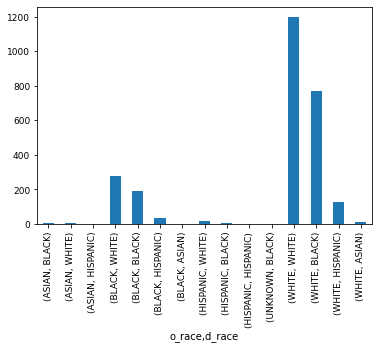

In [ ]:
bargraph = df5.plot.bar(x = 'd_race', y = 'o_race', fontsize='9')

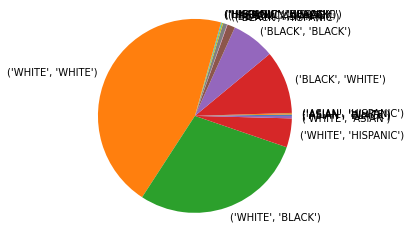

In [ ]:
# Data to plot
labels = []
sizes = []

for x, y in df5.items():
    labels.append(x)
    sizes.append(y)

# Plot
plt.pie(sizes, labels=labels)

plt.axis('equal')
plt.show()

In [493]:
df9 = df4.groupby(["o_race"])["o_race"].value_counts()

print(df9)

o_race    o_race  
ASIAN     ASIAN         13
BLACK     BLACK        523
HISPANIC  HISPANIC      27
UNKNOWN   UNKNOWN        1
WHITE     WHITE       2102
Name: o_race, dtype: int64


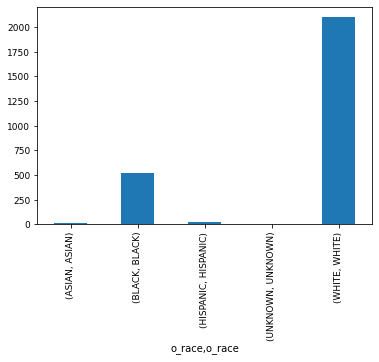

In [496]:
bargraph = df9.plot.bar(x = '', y = 'o_race', fontsize='9')

In [ ]:
# url = "https://www.census.gov/quickfacts/jeffersoncountykentucky"

# with urllib.request.urlopen(url) as i:
#     html = i.read()
    
# data = pd.read_html(html)[0]
# print(data.head(30))

  All Topics Population Age and Sex Race and Hispanic Origin Population Characteristics Housing Families & Living Arrangements Computer and Internet Use Education Health Economy Transportation Income & Poverty Businesses Geography  \
0         Population Estimates, July 1 2021, (V2021)                                                                                                                                                                                     

  Jefferson County, Kentucky  
0                  777,874  


In [ ]:
# data.to_csv("lou_pop.csv")

In [ ]:
df = pd.read_csv (r'lou_pop.csv')

filename = 'lou_pop.csv'
with open('lou_pop.csv') as f:
    reader = csv.reader(f)
    header_row = next(reader)
#To display the headers to find correct vales to call min and max
print(header_row)
print("This is the total number of rows in the file:", '\n' ,len(df))

['', 'All Topics Population Age and Sex Race and Hispanic Origin Population Characteristics Housing Families & Living Arrangements Computer and Internet Use Education Health Economy Transportation Income & Poverty Businesses Geography', 'Jefferson County, Kentucky']
This is the total number of rows in the file: 
 1


In [ ]:
API = requests.get('https://www.census.gov/data/developers/data-sets/decennial-census.html')

In [ ]:
data = API.text


In [ ]:
json = json.loads(data)



JSONDecodeError: Expecting value: line 2 column 1 (char 1)

In [491]:
df6 = pd.DataFrame(json["data"])


TypeError: 'module' object is not subscriptable

In [ ]:
print(df6)

In [497]:
df6.head()

NameError: name 'df6' is not defined